## Import all packages and data

In [1]:
# Standard Packages
import pandas as pd
import numpy as np
import markdown

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
hd = pd.read_csv("data/kc_house_data.csv")
f = open('data/column_names.md', 'r')
desc=markdown.markdown( f.read() )
hd

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0          7140     1.0         NO        NO  ...       PUBLIC       1180   
1          6703     1.0         NO        NO  ...       PUBLIC       1570   
2          6156     1.0         NO        NO  ...       PUBLIC       1580   
3          1400     2.0         NO        NO  ...       PUBLIC       1090   
4           758     2.0         NO        NO  ...       PUBLIC       1120   
...         ...     ...        ...       ...  ...          ...        ...   
30150      4000     1.5         NO        NO  ...       PUBLIC       1600   
30151      5800     2.0         NO        NO  ...       PUBLIC       2020   
30152      3600     1.0         NO        NO  ...       PUBLIC        940   
30153      2889     2.0         NO        NO  ...       PUBLIC       1830   
30154     11058     1.0         NO        NO  ...       PUBLIC       1200   

      sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0                 0           0         40     1969             0   
1              1570           0        240     1950             0   
2              1580           0          0     1956             0   
3              1070         200        270     2010             0   
4               550         550         30     2012             0   
...             ...         ...        ...      ...           ...   
30150          1130           0        210     1921             0   
30151             0           0        520     2011             0   
30152           920         240        110     1995             0   
30153           740         480        100     2006             0   
30154             0         420          0     1965             0   

                                                 address        lat       long  
0      2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1      11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2      8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3      4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4      2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  
...                                                  ...        ...        ...  
30150  4673 Eastern Avenue North, Seattle, Washington...  47.664740 -122.32940  
30151  4131 44th Avenue Southwest, Seattle, Washingto...  47.565610 -122.38851  
30152  910 Martin Luther King Jr Way, Seattle, Washin...  47.610395 -122.29585  
30153  17127 114th Avenue Southeast, Renton, Washingt...  47.449490 -122.18908  
30154  18615 7th Avenue South, Burien, Washington 981...  47.435840 -122.32634  

[30155 rows x 25 columns]

In [3]:
hd.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [4]:
hd.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  3.015500e+04  3.015500e+04  30155.000000  30155.000000  30155.000000   
mean   4.538104e+09  1.108536e+06      3.413530      2.334737   2112.424739   
std    2.882587e+09  8.963857e+05      0.981612      0.889556    974.044318   
min    1.000055e+06  2.736000e+04      0.000000      0.000000      3.000000   
25%    2.064175e+09  6.480000e+05      3.000000      2.000000   1420.000000   
50%    3.874011e+09  8.600000e+05      3.000000      2.500000   1920.000000   
75%    7.287100e+09  1.300000e+06      4.000000      3.000000   2619.500000   
max    9.904000e+09  3.075000e+07     13.000000     10.500000  15360.000000   

           sqft_lot        floors    sqft_above  sqft_basement   sqft_garage  \
count  3.015500e+04  30155.000000  30155.000000   30155.000000  30155.000000   
mean   1.672360e+04      1.543492   1809.826098     476.039396    330.211142   
std    6.038260e+04      0.567717    878.306131     579.631302    285.770536   
min    4.020000e+02      1.000000      2.000000       0.000000      0.000000   
25%    4.850000e+03      1.000000   1180.000000       0.000000      0.000000   
50%    7.480000e+03      1.500000   1560.000000       0.000000    400.000000   
75%    1.057900e+04      2.000000   2270.000000     940.000000    510.000000   
max    3.253932e+06      4.000000  12660.000000    8020.000000   3580.000000   

         sqft_patio      yr_built  yr_renovated           lat          long  
count  30155.000000  30155.000000  30155.000000  30155.000000  30155.000000  
mean     217.412038   1975.163953     90.922301     47.328076   -121.317397  
std      245.302792     32.067362    416.473038      1.434005      5.725475  
min        0.000000   1900.000000      0.000000     21.274240   -157.791480  
25%       40.000000   1953.000000      0.000000     47.405320   -122.326045  
50%      150.000000   1977.000000      0.000000     47.551380   -122.225585  
75%      320.000000   2003.000000      0.000000     47.669913   -122.116205  
max     4370.000000   2022.000000   2022.000000     64.824070    -70.074340

In [5]:
hd[hd['sqft_living'] == 3]

id        date      price  bedrooms  bathrooms  sqft_living  \
14977  1549500215  12/17/2021  1803000.0         4        4.0            3   

       sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
14977    326701     2.0         NO        NO  ...      PRIVATE          2   

      sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
14977             1           1          0     2021             0   

                                                 address       lat       long  
14977  31072 Northeast 165th Street, Duvall, Washingt...  47.74529 -121.92362  

[1 rows x 25 columns]

In [6]:
hd.drop(index = 14977, axis = 0, inplace = True)

In [7]:
# find and drop sales records with no bedrooms or no bathrooms
nobed_nobath = hd.loc[(hd['bedrooms'] == 0) | (hd['bathrooms'] == 0)]
hd.drop(index = nobed_nobath.index, inplace = True, axis = 0)

In [8]:
#add zip column for zipcodes
hd["zip"] = hd.address.str[-20:-15]

#remove data that is outside of King County
zips=[98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]
zips_strings = [str(i) for i in zips]
zips = zips_strings
non_wa_zips = hd.loc[~hd["zip"].isin(zips)]
hd.drop(index = non_wa_zips.index, inplace = True, axis = 0)

#convert zip category to integers
hd["zip"] = hd["zip"].astype(int)

#remove duplicate rows
hd = hd.drop_duplicates(subset=["id"])

In [9]:
#remove id column
hd = hd.drop(columns=["id"])

#add columns for year sold and years old
hd["year_sold"] = hd.date.str[-4:].astype(int)
hd["years_old"] = 2023-hd["yr_built"]

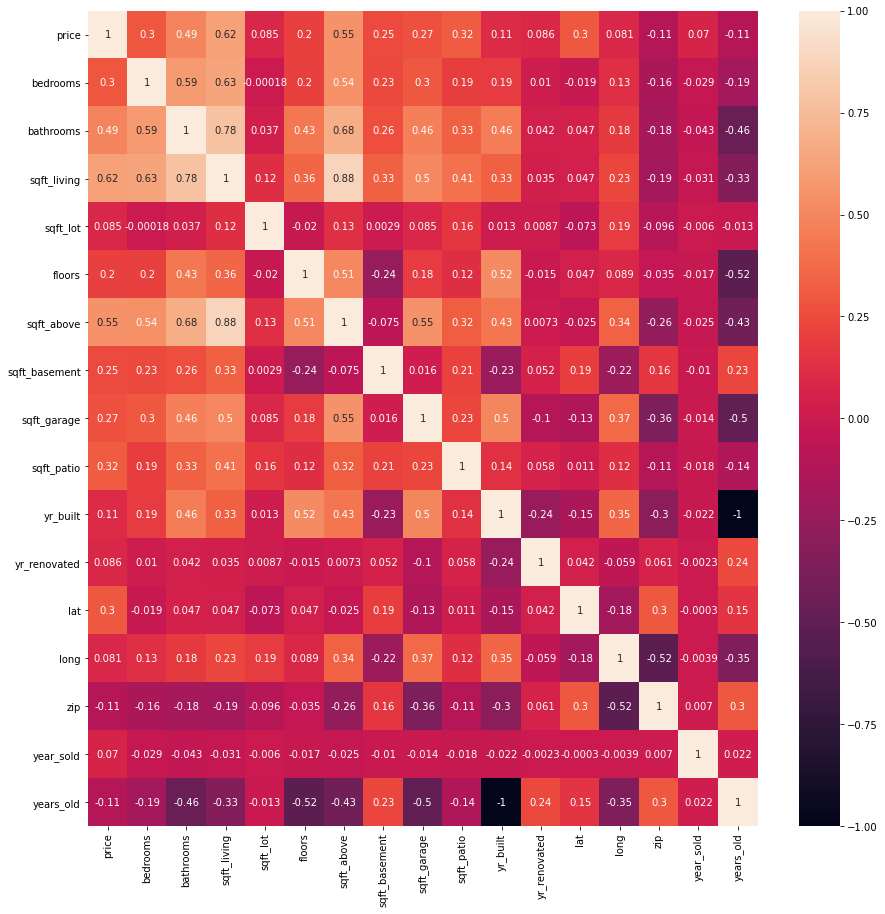

In [10]:
#plot the heatmap to determine correlations
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(hd.corr(), annot=True);

In [11]:
#list correlations
price_corrs = hd.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.620117
sqft_above       0.549083
bathrooms        0.491485
sqft_patio       0.318593
lat              0.298873
bedrooms         0.295277
sqft_garage      0.269111
sqft_basement    0.247288
floors           0.201767
yr_built         0.107067
years_old        0.107067
zip              0.106358
yr_renovated     0.085973
sqft_lot         0.084831
long             0.081021
year_sold        0.070306
Name: price, dtype: float64

## Simple Linear Regression - Baseline Model with Train-Test Split

In [12]:
# define variables for simple linear regression
y = hd['price']
X = hd.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# double check train-test split 
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 21873 rows and 26 columns
y_train is a Series with 21873 values


In [13]:
# select our best correlated predictor, as our X Train
baseline_X_train = X_train[['sqft_living']]

# Do the same for X Test
baseline_X_test = X_test[['sqft_living']]

# instantiate the baseline model
baseline_model = LinearRegression()

# Fit our model
baseline_model.fit(baseline_X_train, y_train)

# Get our R2 score
print('Base Training R2:', round(baseline_model.score(baseline_X_train, y_train), 4))
print('Base Test R2:', round(baseline_model.score(baseline_X_test, y_test), 4))
print()

# set up a validation model 
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=baseline_X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Validation Checks")
print("Baseline Model Train score:", round(baseline_scores["train_score"].mean(), 4))
print("Baseline Model Validation score:", round(baseline_scores["test_score"].mean(), 4))
print()

# Calculate predictions on training and test sets
train_preds = baseline_model.predict(baseline_X_train)
test_preds = baseline_model.predict(baseline_X_test)

# Calculate training and test MSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print('Train Root Mean Squared Error:', train_rmse)
print('Test Root Mean Squared Error:', test_rmse)
print('Difference in RMSE for Test/Train:', abs(round(test_rmse - train_rmse, 2)))

Base Training R2: 0.4058
Base Test R2: 0.3252

Validation Checks
Baseline Model Train score: 0.398
Baseline Model Validation score: 0.4306

Train Root Mean Squared Error: 681623.3182668397
Test Root Mean Squared Error: 753813.4186429505
Difference in RMSE for Test/Train: 72190.1


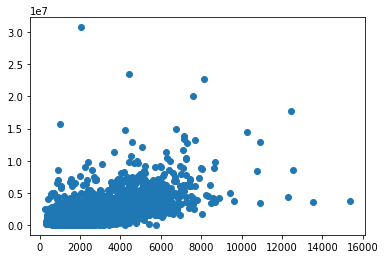

In [14]:
plt.scatter(x=hd["sqft_living"], y=hd["price"]);

## Polynomial Model

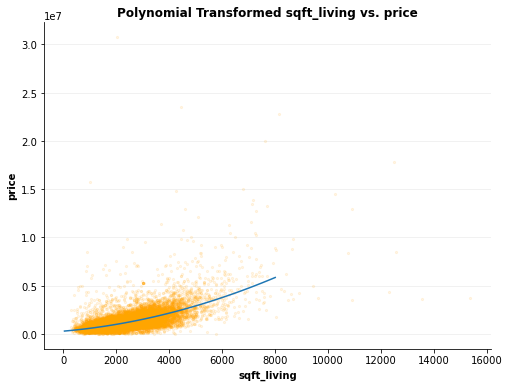

In [15]:
# fit and transform the X_train sqft_living column to a poly of 2
poly2 = PolynomialFeatures(2)
poly_sqft = poly2.fit_transform(X_train[['sqft_living']])

# instantiate a PolynomialFeatures and fit/transfrom to X_poly
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(baseline_X_train)

# fit X_poly to Linear Regression model 
reg_poly = LinearRegression().fit(X_poly, y_train)

# create line parameters 
X_linspace = pd.DataFrame(np.linspace(50, 8000, 50), columns= ['sqft_living'])

# create poly line X and Y values
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

# set up fig
fig, ax = plt.subplots(figsize=(8, 6))

# plot polynomial regression line against the data
plt.scatter(hd['sqft_living'], hd['price'], 
            s = 5, alpha = 0.1, 
            color='orange')

plt.plot(X_linspace, y_poly_pred)
plt.xlabel('sqft_living', weight = 'bold')
plt.ylabel('price', weight = 'bold')
ax.set_title('Polynomial Transformed sqft_living vs. price', weight = 'bold');

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show();

In [16]:
# instantiate a poly baseline model
poly_baseline_model = LinearRegression()

# Fit our poly model
poly_baseline_model.fit(X_poly, y_train)
poly_baseline_model.score(X_poly, y_train)

0.431359547772741

## Add School Data

Data from https://data.wa.gov/education/Report-Card-Assessment-Data-2021-22-School-Year/v928-8kke and https://eds.ospi.k12.wa.us/directoryeds.aspx

In [17]:
#Import school data
rc = pd.read_csv("data/Report_Card_Assessment_Data_2021-22_School_Year.csv")
addresses=pd.read_csv("data/Washington_School_Directory_20230214.csv")

#Clean up Addresses dataframe
addresses["ZipCode"] = addresses["ZipCode"].apply(lambda x: x[:5])
non_waaddresses = addresses[~addresses['ZipCode'].isin(zips)]
addresses.drop(index = non_waaddresses.index, inplace = True, axis = 0)
addresses=addresses[["SchoolName", "ZipCode"]]

#Clean up Report Card dataframe

rc = rc[["OrganizationLevel", "County", "SchoolName", "GradeLevel", "TestSubject", "PercentMetStandard"]]
rc = rc[rc["County"] == "King"].drop(columns=["County"])
rc = rc[rc["OrganizationLevel"] == "School"].drop(columns=["OrganizationLevel"])
rc = rc[rc["GradeLevel"] == "All Grades"].drop(columns=["GradeLevel"])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
#Standardize data under percent met standard column
rc["PercentMetStandard"]=rc["PercentMetStandard"].replace("Suppressed: N<10", "0.0%")
rc["PercentMetStandard"]=rc["PercentMetStandard"].replace("No Students", "0.0%")
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip("%"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip(">"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip("<"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].astype(float)

#Average test scores and create a ratings column
rc = rc.groupby(["SchoolName"]).aggregate({"PercentMetStandard":"mean"}).sort_values(by=["SchoolName"]).reset_index()
rc["rating"] = rc["PercentMetStandard"]/10

In [19]:
#Join dataframes and remove excess columns
schools = rc.merge(addresses, left_on="SchoolName", right_on="SchoolName")
schools = schools[["SchoolName", "rating", "ZipCode"]]
schools["ZipCode"] = schools["ZipCode"].astype(int)

In [20]:
schools_dict = dict(zip(schools.ZipCode, round(schools.rating, 1)))

In [21]:
X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)

<ipython-input-21-a4b485f5a02c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)


In [22]:
X_train

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
24120   8/26/2021         3        2.0         1010      7598     1.0   
8411    3/10/2022         3        2.5         1300       825     2.0   
20885   6/24/2021         3        2.0         1950      7070     1.0   
11917   4/27/2022         3        2.0         1770      7544     1.0   
12517    1/3/2022         5        3.5         2690      7200     2.0   
...           ...       ...        ...          ...       ...     ...   
22319   4/20/2022         3        1.5         1400      8863     1.0   
5554    5/18/2022         4        2.5         2170      6408     1.0   
883     4/25/2022         3        2.5         1740      4277     2.0   
16321   7/23/2021         4        3.0         2120      9046     1.0   
24470  12/14/2021         3        1.0         1040      5250     1.0   

      waterfront greenbelt nuisance  view  ... sqft_patio yr_built  \
24120         NO        NO       NO  NONE  ...          0     1947   
8411          NO        NO       NO  NONE  ...          0     2008   
20885         NO        NO       NO  NONE  ...        170     1976   
11917         NO        NO       NO  NONE  ...         80     1977   
12517         NO        NO       NO  GOOD  ...        400     1978   
...          ...       ...      ...   ...  ...        ...      ...   
22319         NO        NO       NO  NONE  ...         60     1990   
5554          NO        NO       NO  NONE  ...        170     1981   
883           NO        NO       NO  NONE  ...         20     1992   
16321         NO        NO       NO  NONE  ...          0     1993   
24470         NO        NO       NO  NONE  ...         80     1953   

      yr_renovated                                            address  \
24120            0  5965 21st Avenue Southwest, Seattle, Washingto...   
8411             0  1127A 18th Ave, Seattle, Washington 98122, Uni...   
20885            0  12534 Southeast 277th Place, Kent, Washington ...   
11917            0  8902 Northeast 144th Street, Kirkland, Washing...   
12517            0  14508 37th Avenue Northeast, Lake Forest Park,...   
...            ...                                                ...   
22319            0  313 Johnson Street, Enumclaw, Washington 98022...   
5554             0  14008 81st Avenue Northeast, Kirkland, Washing...   
883              0  25760 Southeast 35th Place, Sammamish, Washing...   
16321            0  1917 South 369th Street, Federal Way, Washingt...   
24470            0  9359 53rd Avenue South, Seattle, Washington 98...   

             lat        long    zip  year_sold  years_old  avg_school_quality  
24120  47.548270 -122.360050  98106       2021         76                 1.3  
8411   47.611760 -122.309000  98122       2022         15                 0.5  
20885  47.353255 -122.174140  98030       2021         47                 1.5  
11917  47.731640 -122.221600  98034       2022         46                 0.6  
12517  47.734060 -122.288075  98155       2022         45                 3.4  
...          ...         ...    ...        ...        ...                 ...  
22319  47.194440 -121.999240  98022       2022         33                 2.0  
5554   47.726310 -122.233155  98034       2022         42                 0.6  
883    47.577610 -121.995820  98029       2022         31                 5.1  
16321  47.270015 -122.309395  98003       2021         30                 2.0  
24470  47.517260 -122.266585  98118       2021         70                 2.1  

[21873 rows x 27 columns]

In [23]:
scale_mapper1 = {"NONE":0, "FAIR": 1, "AVERAGE":2, "GOOD":3, "EXCELLENT":4}
X_train["view"] = X_train["view"].replace(scale_mapper1)

scale_mapper2 = {"Poor":0, "Fair": 1, "Average":2, "Good":3, "Very Good":4}
X_train["condition"] = X_train["condition"].replace(scale_mapper2)

scale_mapper3 = {"1 Cabin":1, "2 Substandard": 2, "3 Poor":3, "4 Low":4, "5 Fair":5, 
               "6 Low Average":6, "7 Average": 7, "8 Good":8, "9 Better":9, "10 Very Good":10,
               "11 Excellent": 11, "12 Luxury":12, "13 Mansion":13 }
X_train["grade"] = X_train["grade"].replace(scale_mapper3)

<ipython-input-23-7dad008bcee4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["view"] = X_train["view"].replace(scale_mapper1)
<ipython-input-23-7dad008bcee4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["condition"] = X_train["condition"].replace(scale_mapper2)
<ipython-input-23-7dad008bcee4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [24]:
X_train['renovated'] = np.where(X_train['yr_renovated'] > 0, 1, 0)
X_train.drop('yr_renovated', axis = 1, inplace = True)
X_train['renovated'].value_counts()

<ipython-input-24-e970d81e40db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['renovated'] = np.where(X_train['yr_renovated'] > 0, 1, 0)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


0    20837
1     1036
Name: renovated, dtype: int64

In [25]:
X_train = pd.get_dummies(X_train, columns = ['waterfront', 'greenbelt', 'nuisance', 'renovated'], drop_first = True)

In [26]:
X_train = X_train.drop(columns=["heat_source", "sewer_system", "address", "lat", "long"])

In [27]:
X_train.loc[X_train['avg_school_quality'].isna()] = X_train['avg_school_quality'].mean()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21873 entries, 24120 to 24470
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                21873 non-null  object 
 1   bedrooms            21873 non-null  float64
 2   bathrooms           21873 non-null  float64
 3   sqft_living         21873 non-null  float64
 4   sqft_lot            21873 non-null  float64
 5   floors              21873 non-null  float64
 6   view                21873 non-null  float64
 7   condition           21873 non-null  float64
 8   grade               21873 non-null  float64
 9   sqft_above          21873 non-null  float64
 10  sqft_basement       21873 non-null  float64
 11  sqft_garage         21873 non-null  float64
 12  sqft_patio          21873 non-null  float64
 13  yr_built            21873 non-null  float64
 14  zip                 21873 non-null  float64
 15  year_sold           21873 non-null  float64
 16  

# All Variable Model

In [28]:
all_variable_X = X_train
all_variable_X = all_variable_X.drop(columns=["date", "year_sold"])
all_variable_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21873 entries, 24120 to 24470
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            21873 non-null  float64
 1   bathrooms           21873 non-null  float64
 2   sqft_living         21873 non-null  float64
 3   sqft_lot            21873 non-null  float64
 4   floors              21873 non-null  float64
 5   view                21873 non-null  float64
 6   condition           21873 non-null  float64
 7   grade               21873 non-null  float64
 8   sqft_above          21873 non-null  float64
 9   sqft_basement       21873 non-null  float64
 10  sqft_garage         21873 non-null  float64
 11  sqft_patio          21873 non-null  float64
 12  yr_built            21873 non-null  float64
 13  zip                 21873 non-null  float64
 14  years_old           21873 non-null  float64
 15  avg_school_quality  21873 non-null  float64
 16  

In [29]:
all_variable_model = sm.OLS(y_train, sm.add_constant(all_variable_X)).fit()
all_variable_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     1327.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:16:17   Log-Likelihood:            -3.2184e+05
No. Observations:               21873   AIC:                         6.437e+05
Df Residuals:                   21852   BIC:                         6.439e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -3.61e+06   2.13e+05    -16.945      0.000   -4.03e+06   -3.19e+06
bedrooms           -9.335e+04   5659.263    -16.495      0.000   -1.04e+05   -8.23e+04
bathrooms           9.724e+04   8306.121     11.707      0.000     8.1e+04    1.14e+05
sqft_living          157.1814     18.771      8.374      0.000     120.389     193.974
sqft_lot              -0.0609      0.067     -0.909      0.363      -0.192       0.070
floors             -1.022e+05   1.06e+04     -9.659      0.000   -1.23e+05   -8.14e+04
view                7.715e+04   5562.708     13.870      0.000    6.62e+04    8.81e+04
condition           2.889e+04   6374.695      4.532      0.000    1.64e+04    4.14e+04
grade               2.247e+05   6063.402     37.062      0.000    2.13e+05    2.37e+05
sqft_above           260.8900     19.027     13.712      0.000     223.596     298.184
sqft_basement        113.7331     14.037      8.102      0.000      86.219     141.247
sqft_garage         -189.7361     20.156     -9.414      0.000    -229.242    -150.230
sqft_patio            71.8215     18.734      3.834      0.000      35.101     108.542
yr_built            1.132e+04   4210.896      2.688      0.007    3065.135    1.96e+04
zip                 -214.6523     86.665     -2.477      0.013    -384.523     -44.782
years_old           1.502e+04   4255.285      3.529      0.000    6676.552    2.34e+04
avg_school_quality  9.041e+04   2536.996     35.637      0.000    8.54e+04    9.54e+04
waterfront_YES       8.65e+05    3.4e+04     25.442      0.000    7.98e+05    9.32e+05
greenbelt_YES       2.944e+04   2.57e+04      1.147      0.251   -2.09e+04    7.98e+04
nuisance_YES        3.188e+04   1.09e+04      2.934      0.003    1.06e+04    5.32e+04
renovated_1         4.542e+04   2.05e+04      2.218      0.027    5279.932    8.56e+04
==============================================================================
Omnibus:                    27883.355   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16366527.541
Skew:                           6.580   Prob(JB):                         0.00
Kurtosis:                     136.360   Cond. No.                     5.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#add requirements for our stakeholder
hd = hd.loc[(hd["bedrooms"] > 1) & (hd["bedrooms"]<=5)]
hd = hd.loc[hd["price"]<=1300000]
hd = hd.drop(columns=["date"])

# Recursive Feature Elimination Model

In [30]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 5)

In [31]:
select.fit(X = all_variable_X, y = y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [32]:
select.ranking_

array([ 9,  1, 10, 16,  1,  1,  7,  1, 13, 14, 12, 15,  8, 11,  5,  4,  1,
        3,  6,  2])

In [33]:
all_variable_X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'zip', 'years_old', 'avg_school_quality',
       'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'renovated_1'],
      dtype='object')

In [34]:
pd.DataFrame(data=select.ranking_, index=all_variable_X.columns)

0
bedrooms             9
bathrooms            1
sqft_living         10
sqft_lot            16
floors               1
view                 1
condition            7
grade                1
sqft_above          13
sqft_basement       14
sqft_garage         12
sqft_patio          15
yr_built             8
zip                 11
years_old            5
avg_school_quality   4
waterfront_YES       1
greenbelt_YES        3
nuisance_YES         6
renovated_1          2

In [35]:
rfe_X = all_variable_X[['bathrooms', 'floors', 'grade', 'avg_school_quality', 'greenbelt_YES', 'waterfront_YES']]
all_variable_model = sm.OLS(y_train, sm.add_constant(rfe_X)).fit()
all_variable_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     3087.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:16:18   Log-Likelihood:            -3.2382e+05
No. Observations:               21873   AIC:                         6.477e+05
Df Residuals:                   21866   BIC:                         6.477e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.123e+06   3.07e+04    -69.035      0.000   -2.18e+06   -2.06e+06
bathrooms           2.133e+05   6659.150     32.025      0.000       2e+05    2.26e+05
floors             -2.023e+05   9322.655    -21.700      0.000   -2.21e+05   -1.84e+05
grade               3.533e+05   5259.434     67.173      0.000    3.43e+05    3.64e+05
avg_school_quality  1.026e+05   2706.783     37.920      0.000    9.73e+04    1.08e+05
greenbelt_YES      -1.631e+05   2.51e+04     -6.501      0.000   -2.12e+05   -1.14e+05
waterfront_YES       1.05e+06   2.86e+04     36.750      0.000    9.94e+05    1.11e+06
==============================================================================
Omnibus:                    27471.134   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12737076.027
Skew:                           6.481   Prob(JB):                         0.00
Kurtosis:                     120.506   Cond. No.                         64.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation

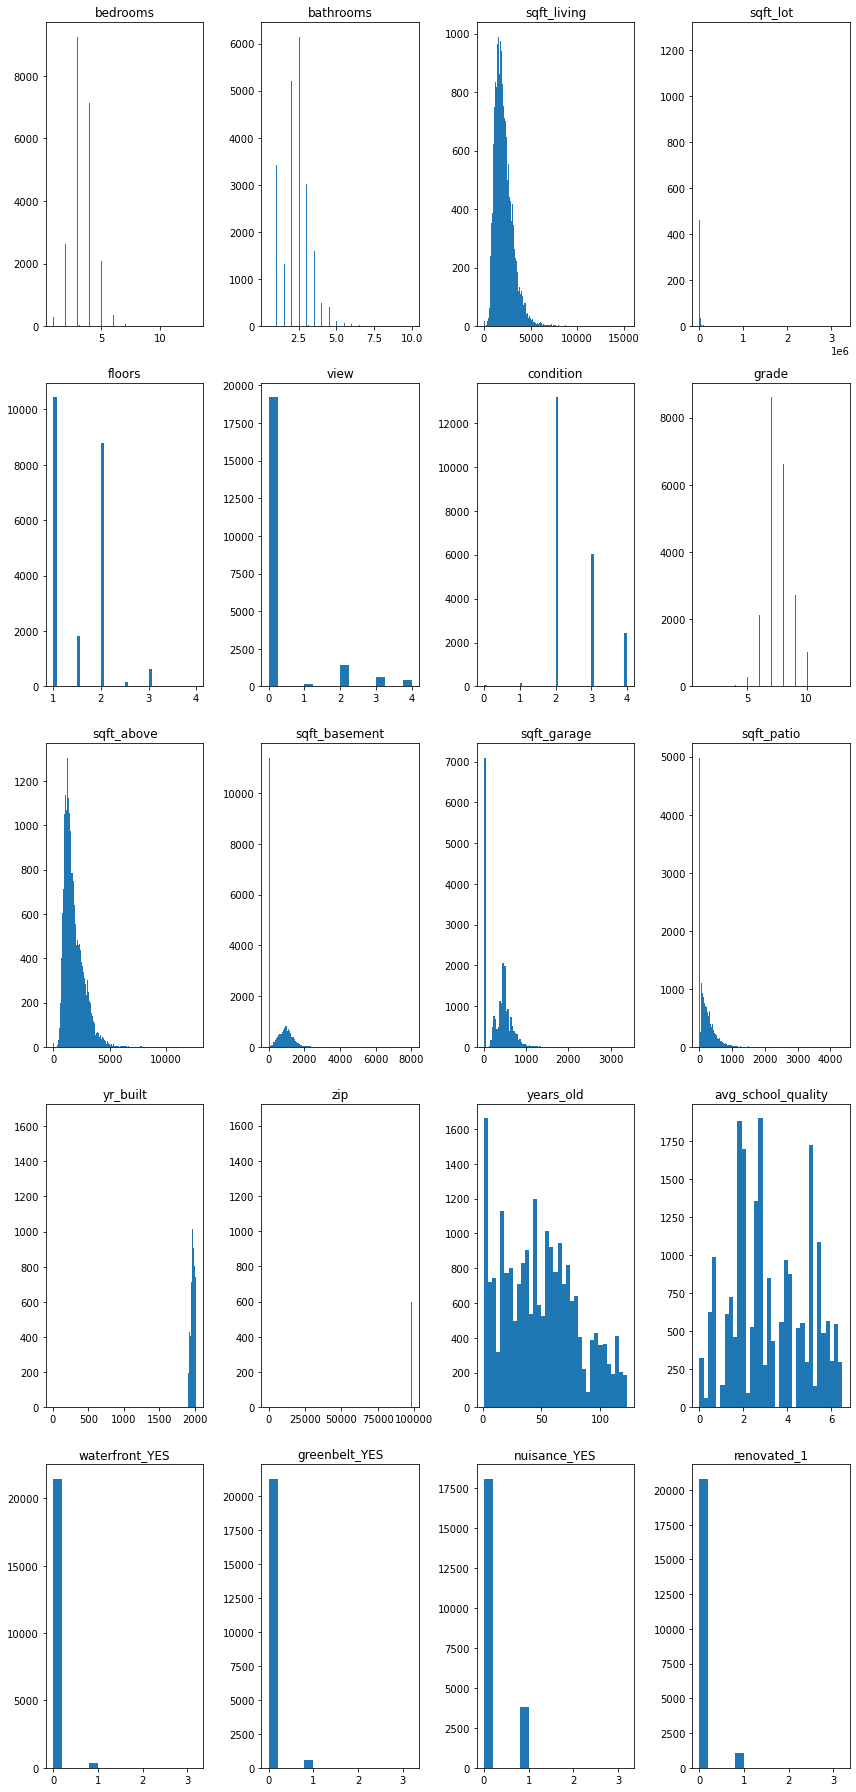

In [36]:
# set up figure for predictor variables in all_variable_X
fig, axes = plt.subplots(nrows=(all_variable_X.shape[1] // 4), ncols=4, figsize=(12,25))

# for each col in X_third, plot distribution
for col, ax in zip(all_variable_X, axes.flatten()):
    ax.hist(all_variable_X[col], bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

In [37]:
#selecting variables for log
log_variables = ['sqft_living','sqft_above', 'years_old']

# assign to X_cont
X_logs = all_variable_X[log_variables]

In [38]:
X_logs

sqft_living  sqft_above  years_old
24120       1010.0      1010.0       76.0
8411        1300.0       880.0       15.0
20885       1950.0      1080.0       47.0
11917       1770.0      1290.0       46.0
12517       2690.0      1720.0       45.0
...            ...         ...        ...
22319       1400.0      1400.0       33.0
5554        2170.0      1440.0       42.0
883         1740.0      1740.0       31.0
16321       2120.0      1510.0       30.0
24470       1040.0      1040.0       70.0

[21873 rows x 3 columns]

In [39]:
X_logs.describe()

sqft_living    sqft_above     years_old
count  21873.000000  21873.000000  21873.000000
mean    2131.292809   1828.396910     49.328973
std      982.504208    887.086457     31.773755
min        3.201025      3.201025      1.000000
25%     1440.000000   1190.000000     22.000000
50%     1950.000000   1580.000000     47.000000
75%     2640.000000   2300.000000     71.000000
max    15360.000000  12660.000000    123.000000

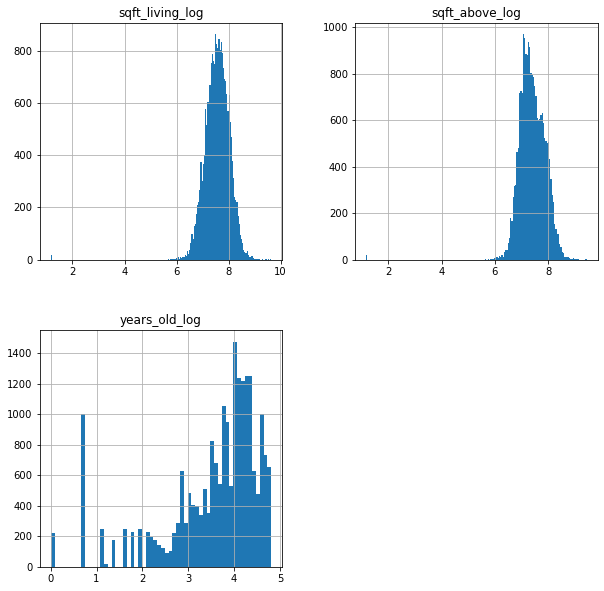

In [40]:
#log transformation
log_columns = [f'{column}_log' for column in X_logs.columns]
cont_log = np.log(X_logs)
cont_log.columns = log_columns
cont_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

In [41]:
cont_log

sqft_living_log  sqft_above_log  years_old_log
24120         6.917706        6.917706       4.330733
8411          7.170120        6.779922       2.708050
20885         7.575585        6.984716       3.850148
11917         7.478735        7.162397       3.828641
12517         7.897296        7.450080       3.806662
...                ...             ...            ...
22319         7.244228        7.244228       3.496508
5554          7.682482        7.272398       3.737670
883           7.461640        7.461640       3.433987
16321         7.659171        7.319865       3.401197
24470         6.946976        6.946976       4.248495

[21873 rows x 3 columns]

In [42]:
log_transformed = cont_log.join(all_variable_X).drop(columns = ["sqft_living", "sqft_above", "sqft_lot", 'years_old',
                                                                "yr_built", "sqft_basement", "sqft_garage", "sqft_patio"])
log_transformed

sqft_living_log  sqft_above_log  years_old_log  bedrooms  bathrooms  \
24120         6.917706        6.917706       4.330733       3.0        2.0   
8411          7.170120        6.779922       2.708050       3.0        2.5   
20885         7.575585        6.984716       3.850148       3.0        2.0   
11917         7.478735        7.162397       3.828641       3.0        2.0   
12517         7.897296        7.450080       3.806662       5.0        3.5   
...                ...             ...            ...       ...        ...   
22319         7.244228        7.244228       3.496508       3.0        1.5   
5554          7.682482        7.272398       3.737670       4.0        2.5   
883           7.461640        7.461640       3.433987       3.0        2.5   
16321         7.659171        7.319865       3.401197       4.0        3.0   
24470         6.946976        6.946976       4.248495       3.0        1.0   

       floors  view  condition  grade      zip  avg_school_quality  \
24120     1.0   0.0        4.0    6.0  98106.0                 1.3   
8411      2.0   0.0        2.0    8.0  98122.0                 0.5   
20885     1.0   0.0        3.0    7.0  98030.0                 1.5   
11917     1.0   0.0        2.0    8.0  98034.0                 0.6   
12517     2.0   3.0        2.0    9.0  98155.0                 3.4   
...       ...   ...        ...    ...      ...                 ...   
22319     1.0   0.0        3.0    6.0  98022.0                 2.0   
5554      1.0   0.0        2.0    8.0  98034.0                 0.6   
883       2.0   0.0        3.0    8.0  98029.0                 5.1   
16321     1.0   0.0        2.0    8.0  98003.0                 2.0   
24470     1.0   0.0        2.0    7.0  98118.0                 2.1   

       waterfront_YES  greenbelt_YES  nuisance_YES  renovated_1  
24120             0.0            0.0           0.0          0.0  
8411              0.0            0.0           0.0          0.0  
20885             0.0            0.0           0.0          0.0  
11917             0.0            0.0           0.0          0.0  
12517             0.0            0.0           0.0          0.0  
...               ...            ...           ...          ...  
22319             0.0            0.0           0.0          0.0  
5554              0.0            0.0           0.0          0.0  
883               0.0            0.0           0.0          0.0  
16321             0.0            0.0           0.0          0.0  
24470             0.0            0.0           0.0          0.0  

[21873 rows x 15 columns]

In [43]:
log_y = np.log(y_train)

In [44]:
log_model = sm.OLS(log_y, sm.add_constant(log_transformed)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     1727.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:16:43   Log-Likelihood:                -10665.
No. Observations:               21873   AIC:                         2.136e+04
Df Residuals:                   21857   BIC:                         2.149e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.0423      0.138     72.850      0.000       9.772      10.312
sqft_living_log        0.3084      0.017     18.295      0.000       0.275       0.341
sqft_above_log         0.0043      0.014      0.308      0.758      -0.023       0.032
years_old_log          0.0607      0.004     17.295      0.000       0.054       0.068
bedrooms              -0.0154      0.004     -3.920      0.000      -0.023      -0.008
bathrooms              0.0709      0.005     13.472      0.000       0.061       0.081
floors                 0.0154      0.007      2.234      0.026       0.002       0.029
view                   0.0602      0.004     16.744      0.000       0.053       0.067
condition              0.0406      0.004      9.833      0.000       0.033       0.049
grade                  0.1782      0.004     46.650      0.000       0.171       0.186
zip                -8.121e-06   1.61e-06     -5.044      0.000   -1.13e-05   -4.97e-06
avg_school_quality     0.0880      0.002     53.390      0.000       0.085       0.091
waterfront_YES         0.2081      0.022      9.274      0.000       0.164       0.252
greenbelt_YES          0.0909      0.017      5.356      0.000       0.058       0.124
nuisance_YES           0.0214      0.007      2.998      0.003       0.007       0.035
renovated_1            0.0864      0.013      6.562      0.000       0.061       0.112
==============================================================================
Omnibus:                     6553.497   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84181.873
Skew:                          -1.076   Prob(JB):                         0.00
Kurtosis:                      12.367   Cond. No.                     5.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## One Hot Encode Zip Codes

In [45]:
log_transformed_zips = pd.get_dummies(log_transformed, columns = ['zip'], drop_first = True)
log_transformed_zips.columns

Index(['sqft_living_log', 'sqft_above_log', 'years_old_log', 'bedrooms',
       'bathrooms', 'floors', 'view', 'condition', 'grade',
       'avg_school_quality', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'renovated_1', 'zip_98001.0', 'zip_98002.0', 'zip_98003.0',
       'zip_98004.0', 'zip_98005.0', 'zip_98006.0', 'zip_98007.0',
       'zip_98008.0', 'zip_98010.0', 'zip_98011.0', 'zip_98014.0',
       'zip_98019.0', 'zip_98022.0', 'zip_98023.0', 'zip_98024.0',
       'zip_98027.0', 'zip_98028.0', 'zip_98029.0', 'zip_98030.0',
       'zip_98031.0', 'zip_98032.0', 'zip_98033.0', 'zip_98034.0',
       'zip_98038.0', 'zip_98039.0', 'zip_98040.0', 'zip_98042.0',
       'zip_98045.0', 'zip_98047.0', 'zip_98051.0', 'zip_98052.0',
       'zip_98053.0', 'zip_98055.0', 'zip_98056.0', 'zip_98057.0',
       'zip_98058.0', 'zip_98059.0', 'zip_98065.0', 'zip_98070.0',
       'zip_98072.0', 'zip_98074.0', 'zip_98075.0', 'zip_98077.0',
       'zip_98092.0', 'zip_98102.0', 'zip_98103.0'

In [46]:
log_zips_model = sm.OLS(log_y, sm.add_constant(log_transformed_zips)).fit()
log_zips_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     615.6
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:16:44   Log-Likelihood:                -5645.5
No. Observations:               21873   AIC:                         1.147e+04
Df Residuals:                   21785   BIC:                         1.217e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.0657      0.107     94.333      0.000       9.857      10.275
sqft_living_log        0.2290      0.014     16.809      0.000       0.202       0.256
sqft_above_log         0.2484      0.013     19.756      0.000       0.224       0.273
years_old_log         -0.0079      0.003     -2.591      0.010      -0.014      -0.002
bedrooms              -0.0066      0.003     -2.088      0.037      -0.013      -0.000
bathrooms              0.0412      0.004      9.740      0.000       0.033       0.050
floors                -0.0747      0.006    -12.096      0.000      -0.087      -0.063
view                   0.0658      0.003     22.208      0.000       0.060       0.072
condition              0.0617      0.003     18.450      0.000       0.055       0.068
grade                  0.0907      0.003     27.861      0.000       0.084       0.097
avg_school_quality     0.2589      0.002    111.670      0.000       0.254       0.263
waterfront_YES         0.2894      0.018     15.895      0.000       0.254       0.325
greenbelt_YES          0.0577      0.014      4.138      0.000       0.030       0.085
nuisance_YES          -0.0419      0.006     -7.202      0.000      -0.053      -0.030
renovated_1            0.0659      0.011      6.256      0.000       0.045       0.087
zip_98001.0           -1.2941      0.127    -10.209      0.000      -1.543      -1.046
zip_98002.0           -1.6797      0.128    -13.123      0.000      -1.931      -1.429
zip_98003.0           -1.7043      0.128    -13.289      0.000      -1.956      -1.453
zip_98004.0           -1.1679      0.132     -8.878      0.000      -1.426      -0.910
zip_98005.0           -1.4090      0.133    -10.611      0.000      -1.669      -1.149
zip_98006.0           -1.8403      0.131    -14.052      0.000      -2.097      -1.584
zip_98007.0           -1.0321      0.130     -7.914      0.000      -1.288      -0.776
zip_98008.0           -1.6014      0.131    -12.258      0.000      -1.857      -1.345
zip_98010.0           -2.1956      0.131    -16.745      0.000      -2.453      -1.939
zip_98011.0           -1.2256      0.130     -9.429      0.000      -1.480      -0.971
zip_98014.0           -1.8579      0.133    -14.003      0.000      -2.118      -1.598
zip_98019.0           -1.7492      0.131    -13.332      0.000      -2.006      -1.492
zip_98022.0           -1.6342      0.129    -12.703      0.000      -1.886      -1.382
zip_98023.0           -1.9969      0.129    -15.490      0.000      -2.250      -1.744
zip_98024.0           -2.0469      0.135    -15.216      0.000      -2.311      -1.783
zip_98027.0           -1.7146      0.130    -13.164      0.000      -1.970      -1.459
zip_98028.0           -2.2602      0.133    -17.019      0.000      -2.521      -2.000
zip_98029.0           -1.7637      0.1

In [47]:
zips_ohe = pd.get_dummies(log_transformed['zip'], drop_first = True)
zips_school = zips_ohe.mul(log_transformed_zips['avg_school_quality'], axis = 0)

In [48]:
zips_school_interaction = pd.merge(zips_school, 
                                   log_transformed_zips[['sqft_living_log', 'sqft_above_log',
                                                         'years_old_log', 'bathrooms',
                                                         'bedrooms', 'floors', 'view',
                                                         'condition', 'grade','waterfront_YES',
                                                         'greenbelt_YES', 'nuisance_YES', 'renovated_1']], 
                                   how = 'inner', left_on = zips_school.index, right_on = log_transformed_zips.index)
#zips_school_interaction
zips_school_interaction=zips_school_interaction.rename(columns={'key_0': 'index'})

# zips_school_interaction.rename(index={'key_0': 'index'})
zips_school_interaction.set_index('index', inplace = True)

In [49]:
zips_school_interaction


98001.0  98002.0  98003.0  98004.0  98005.0  98006.0  98007.0  98008.0  \
index                                                                           
24120      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8411       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
20885      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
11917      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
12517      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
22319      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5554       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
883        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
16321      0.0      0.0      2.0      0.0      0.0      0.0      0.0      0.0   
24470      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

       98010.0  98011.0  ...  bathrooms  bedrooms  floors  view  condition  \
index                    ...                                                 
24120      0.0      0.0  ...        2.0       3.0     1.0   0.0        4.0   
8411       0.0      0.0  ...        2.5       3.0     2.0   0.0        2.0   
20885      0.0      0.0  ...        2.0       3.0     1.0   0.0        3.0   
11917      0.0      0.0  ...        2.0       3.0     1.0   0.0        2.0   
12517      0.0      0.0  ...        3.5       5.0     2.0   3.0        2.0   
...        ...      ...  ...        ...       ...     ...   ...        ...   
22319      0.0      0.0  ...        1.5       3.0     1.0   0.0        3.0   
5554       0.0      0.0  ...        2.5       4.0     1.0   0.0        2.0   
883        0.0      0.0  ...        2.5       3.0     2.0   0.0        3.0   
16321      0.0      0.0  ...        3.0       4.0     1.0   0.0        2.0   
24470      0.0      0.0  ...        1.0       3.0     1.0   0.0        2.0   

       grade  waterfront_YES  greenbelt_YES  nuisance_YES  renovated_1  
index                                                                   
24120    6.0             0.0            0.0           0.0          0.0  
8411     8.0             0.0            0.0           0.0          0.0  
20885    7.0             0.0            0.0           0.0          0.0  
11917    8.0             0.0            0.0           0.0          0.0  
12517    9.0             0.0            0.0           0.0          0.0  
...      ...             ...            ...           ...          ...  
22319    6.0             0.0            0.0           0.0          0.0  
5554     8.0             0.0            0.0           0.0          0.0  
883      8.0             0.0            0.0           0.0          0.0  
16321    8.0             0.0            0.0           0.0          0.0  
24470    7.0             0.0            0.0           0.0          0.0  

[21873 rows x 87 columns]

In [50]:
interaction_model = sm.OLS(log_y, sm.add_constant(zips_school_interaction)).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     621.7
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:16:44   Log-Likelihood:                -5750.4
No. Observations:               21873   AIC:                         1.167e+04
Df Residuals:                   21787   BIC:                         1.236e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.5215      0.057    168.000      0.000       9.410       9.633
98001.0            -0.2248      0.038     -5.911      0.000      -0.299      -0.150
98002.0            -0.1196      0.014     -8.414      0.000      -0.147      -0.092
98003.0            -0.0927      0.012     -7.462      0.000      -0.117      -0.068
98004.0             0.2254      0.005     41.383      0.000       0.215       0.236
98005.0             0.1708      0.007     23.454      0.000       0.157       0.185
98006.0             0.1074      0.004     25.005      0.000       0.099       0.116
98007.0             0.2452      0.014     17.575      0.000       0.218       0.273
98008.0             0.1326      0.005     25.093      0.000       0.122       0.143
98010.0            -0.0070      0.006     -1.128      0.259      -0.019       0.005
98011.0             0.1749      0.011     15.961      0.000       0.153       0.196
98014.0             0.0507      0.008      6.001      0.000       0.034       0.067
98019.0             0.0635      0.008      8.313      0.000       0.049       0.078
98022.0            -0.0544      0.012     -4.415      0.000      -0.078      -0.030
98023.0            -0.0525      0.007     -7.492      0.000      -0.066      -0.039
98024.0             0.0725      0.007     10.981      0.000       0.060       0.085
98027.0             0.0951      0.006     16.231      0.000       0.084       0.107
98028.0             0.0564      0.004     13.480      0.000       0.048       0.065
98029.0             0.1088      0.005     20.207      0.000       0.098       0.119
98030.0            -0.0833      0.017     -4.800      0.000      -0.117      -0.049
98031.0            -0.0329      0.010     -3.345      0.001      -0.052      -0.014
98032.0            -0.0410      0.019     -2.189      0.029      -0.078      -0.004
98033.0             0.1520      0.004     36.188      0.000       0.144       0.160
98034.0             0.8798      0.037     23.547      0.000       0.807       0.953
98038.0             0.0120      0.008      1.489      0.136      -0.004       0.028
98039.0             0.2216      0.008     27.801      0.000       0.206       0.237
98040.0             0.1318      0.004     30.726      0.000       0.123       0.140
98042.0            -0.0186      0.004     -4.368      0.000      -0.027      -0.010
98045.0             0.0756      0.009      8.258      0.000       0.058       0.094
98047.0            -0.0531      0.013     -4.006      0.000      -0.079      -0.027
98051.0             0.0322      0.016      2.042      0.041       0.001       0.063
98052.0             0.1432      0.005     28.117      0.000       0.133       0.153
98053.0             0.1307      0.006     20.775      0.000       0.118       0.143
98055.0             0.0002      0.007      0.030      0.976

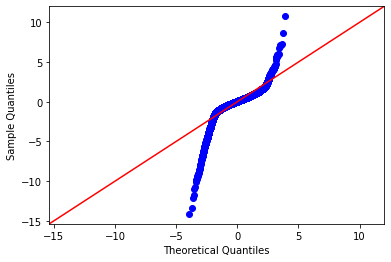

In [51]:
sm.graphics.qqplot(interaction_model.resid, dist=stats.norm, line='45', fit=True)
plt.show()

## Business Question
Considering family homes (2-5 bedrooms) under $1.3 million, how can we maximize school quality and minimize house price?